# Librerias

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import graphviz

Lectura de datos

In [3]:
data = pd.read_csv("heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Esta base de datos contiene 76 atributos. En particular en la base el campo "target" se refiere a la presencia de enfermedad cardíaca en el paciente. Tiene un valor entero, 0 si no tiene enfermedad cardíaca o 4 si la tiene

Información de atributos:

1. Edad
2. Sexo
3. Tipo de dolor en el pecho (Existen 4 valores)
4. Presión arterial en reposo
5. Colesterol sérico [mg/dl]
6. Azucar en la sangre en ayunas > 120 [mg/dl]
7. Resultados electrocardiográficos en reposo (Existen 3 valores)
8. Frecuencia cardiaca máxima alcanzada
9. angina inducida por ejercicio
10. oldpeak = depresión del ST inducida por el ejercicio relativo al descanso
11. Pendiente del segmento ST de ejercicio pico
12. Número de vasos principales (Existen 3 valores) coloreados por flourosopía
13. 3 = normal; 6 = fixed defect; 7 = reversable defect 

Revisión de los datos


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Descripción de los datos


In [128]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Veamos el comportamiento de alguna de las variables 


### Sexo

(-1.1070463552957408,
 1.1107397994971433,
 -1.1115025545223214,
 1.1005477406915392)

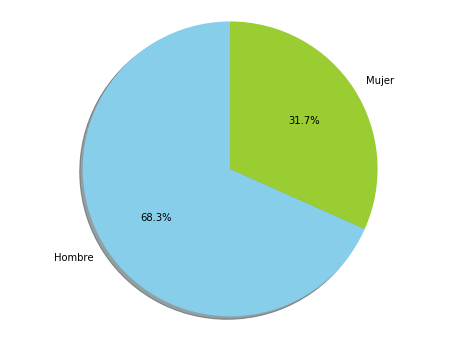

In [131]:
male = len(data[data["sex"] == 1])
female = len(data[data["sex"] == 0])

plt.figure(figsize=(8,6))

labels = "Hombre", "Mujer"
sizes = [male,female]
colors = ["skyblue", "yellowgreen"]
explode = (0,0)

plt.pie(sizes, explode = explode, labels = labels,colors = colors, autopct = "%1.1f%%",shadow = True,startangle = 90)
plt.axis("equal")


### Tipo de dolor de pecho 

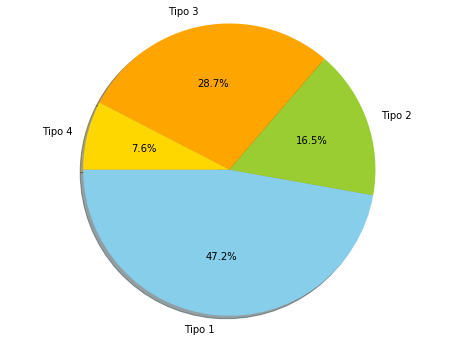

In [142]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Tipo 1','Tipo 2','Tipo 3','Tipo 4'
sizes = [len(data[data['cp'] == 0]),len(data[data['cp'] == 1]),
         len(data[data['cp'] == 2]),
         len(data[data['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.0, 0.0,0.0,0.0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

# Glucemia en ayunas > $120 mg/ml$

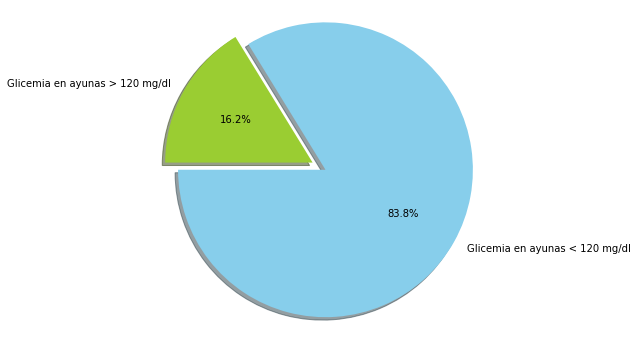

In [138]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Glicemia en ayunas < 120 mg/dl','Glicemia en ayunas > 120 mg/dl'
sizes = [len(data[data['fbs'] == 0]),len(data[data['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

Para verificar algunas correlaciones se muestra la matriz de confusión 



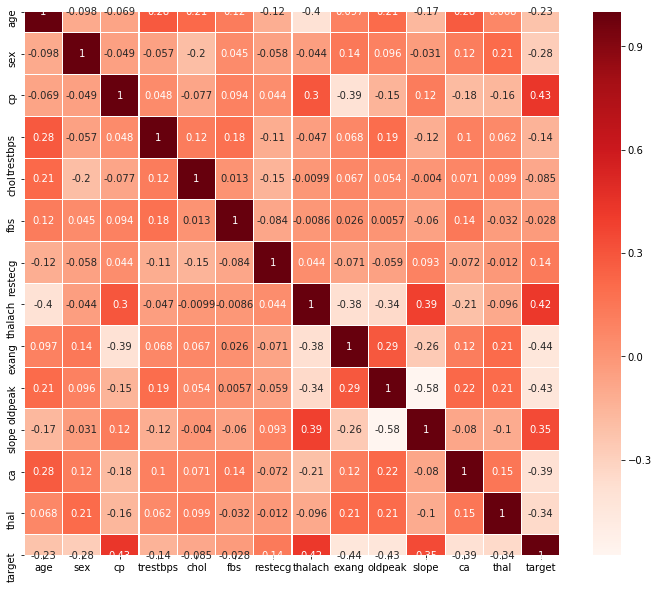

In [143]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor,annot=True, cmap = plt.cm.Reds,linewidths=.1)

Se verifica la distribución de varios atrobutos del conjuntode datos 


### Tasa máxima de frecuencia cardiaca alcanzada 

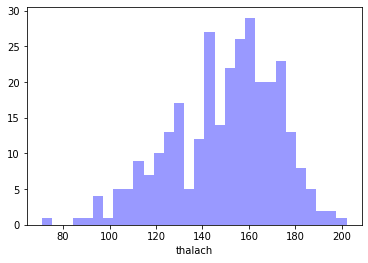

In [144]:
sns.distplot(data["thalach"],kde = False,bins = 30, color = "blue")

###  Colesterol 

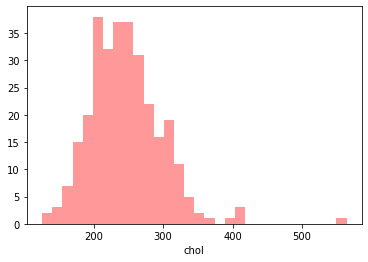

In [146]:
sns.distplot(data['chol'],kde=False,bins=30,color='red')
plt.show()

### Presión arterial en reposo [mm Hg]

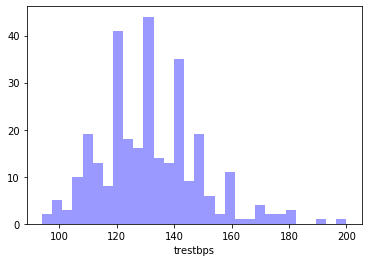

In [148]:
sns.distplot(data['trestbps'],kde=False,bins=30,color='blue')
plt.show()

### Relacion entre enfermedad cardiaca y edad

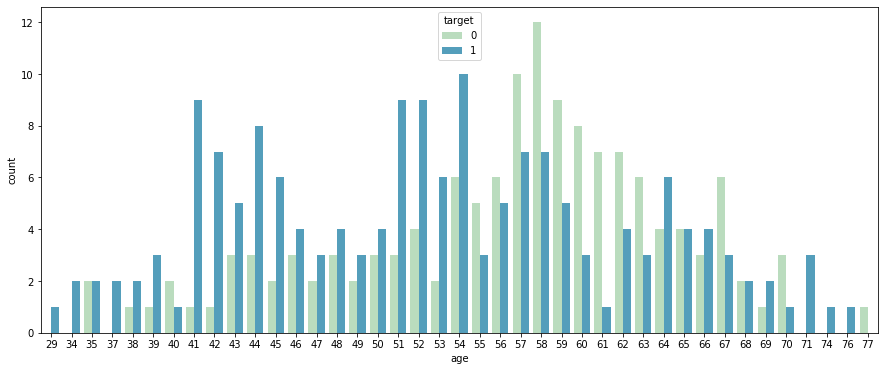

In [150]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'target',palette='GnBu')
plt.show()

### Frecuencia cardiaca máxima alcanzada Vs colesterol

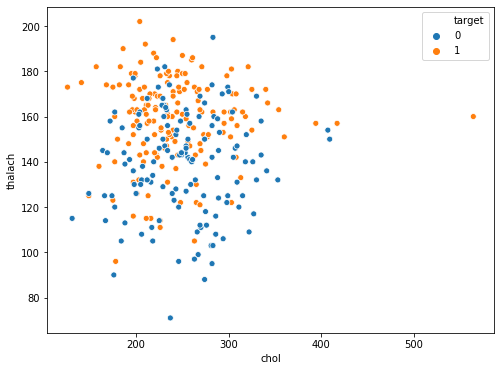

In [152]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=data,hue='target')
plt.show()

## Predicciones

Separando los datos en conjunto de entrenamiento y validación 

In [5]:
X = data[data.columns[data.columns != "target"]]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Obteniendo las variables objetivo 

In [7]:
Y = data["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Para verificar algunas correlaciones se muestra la matriz de confusión 


Ademas la correlación de cada variable con el objetivo

In [118]:
X.corrwith(Y)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

Ahora se separan los datos en conjuntos de entrenamiento y de validacion

In [122]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 0, test_size = 0.2)
print("Tamaño de los conjuntos de datos")
print(train_x.shape, test_x.shape)

Tamaño de los conjuntos de datos
(242, 13) (61, 13)


Construcción del modelo de Random forest 

In [125]:
dt = DecisionTreeClassifier(criterion="entropy", random_state = 0,splitter = "best",max_depth=8)
clf_dt = dt.fit(train_x,train_y)
dot_data = tree.export_graphviz(clf_dt,
                               feature_names = data.columns[:-1],
                               filled=True,
                               rounded = True,
                               special_characters=True,
                               out_file="tree.dot")
pred = dt.predict(test_x)

print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [126]:
print("acurracy: ", clf_dt.score(test_x,test_y))

acurracy:  0.8360655737704918


In [127]:
cross_val_score(dt,X,Y,cv =5)

array([0.7704918 , 0.85245902, 0.73770492, 0.75      , 0.66666667])

Se debe configurar e instalar el paquete *graphviz* , para el mac se siguen las siguientes instrucciones. Se instala por homebrew


### Por terminal 

* brew install graphviz

Luego configurar las variables de entorno , primero revisamos la version instalada

* dot - graphviz version 

Luego ver donde están ubicadas las fuentes

which dot 

* luego redefinir el camino de la variable 

echo $PATH | tr : ' ' | fmt -w1 | grep local /usr/local/bin

con el siguiente comando ejecutado por terminal se transforma la imagen en formato .dot al formato de facil visualización png

* !dot -Tpng tree.dot -o tree.png



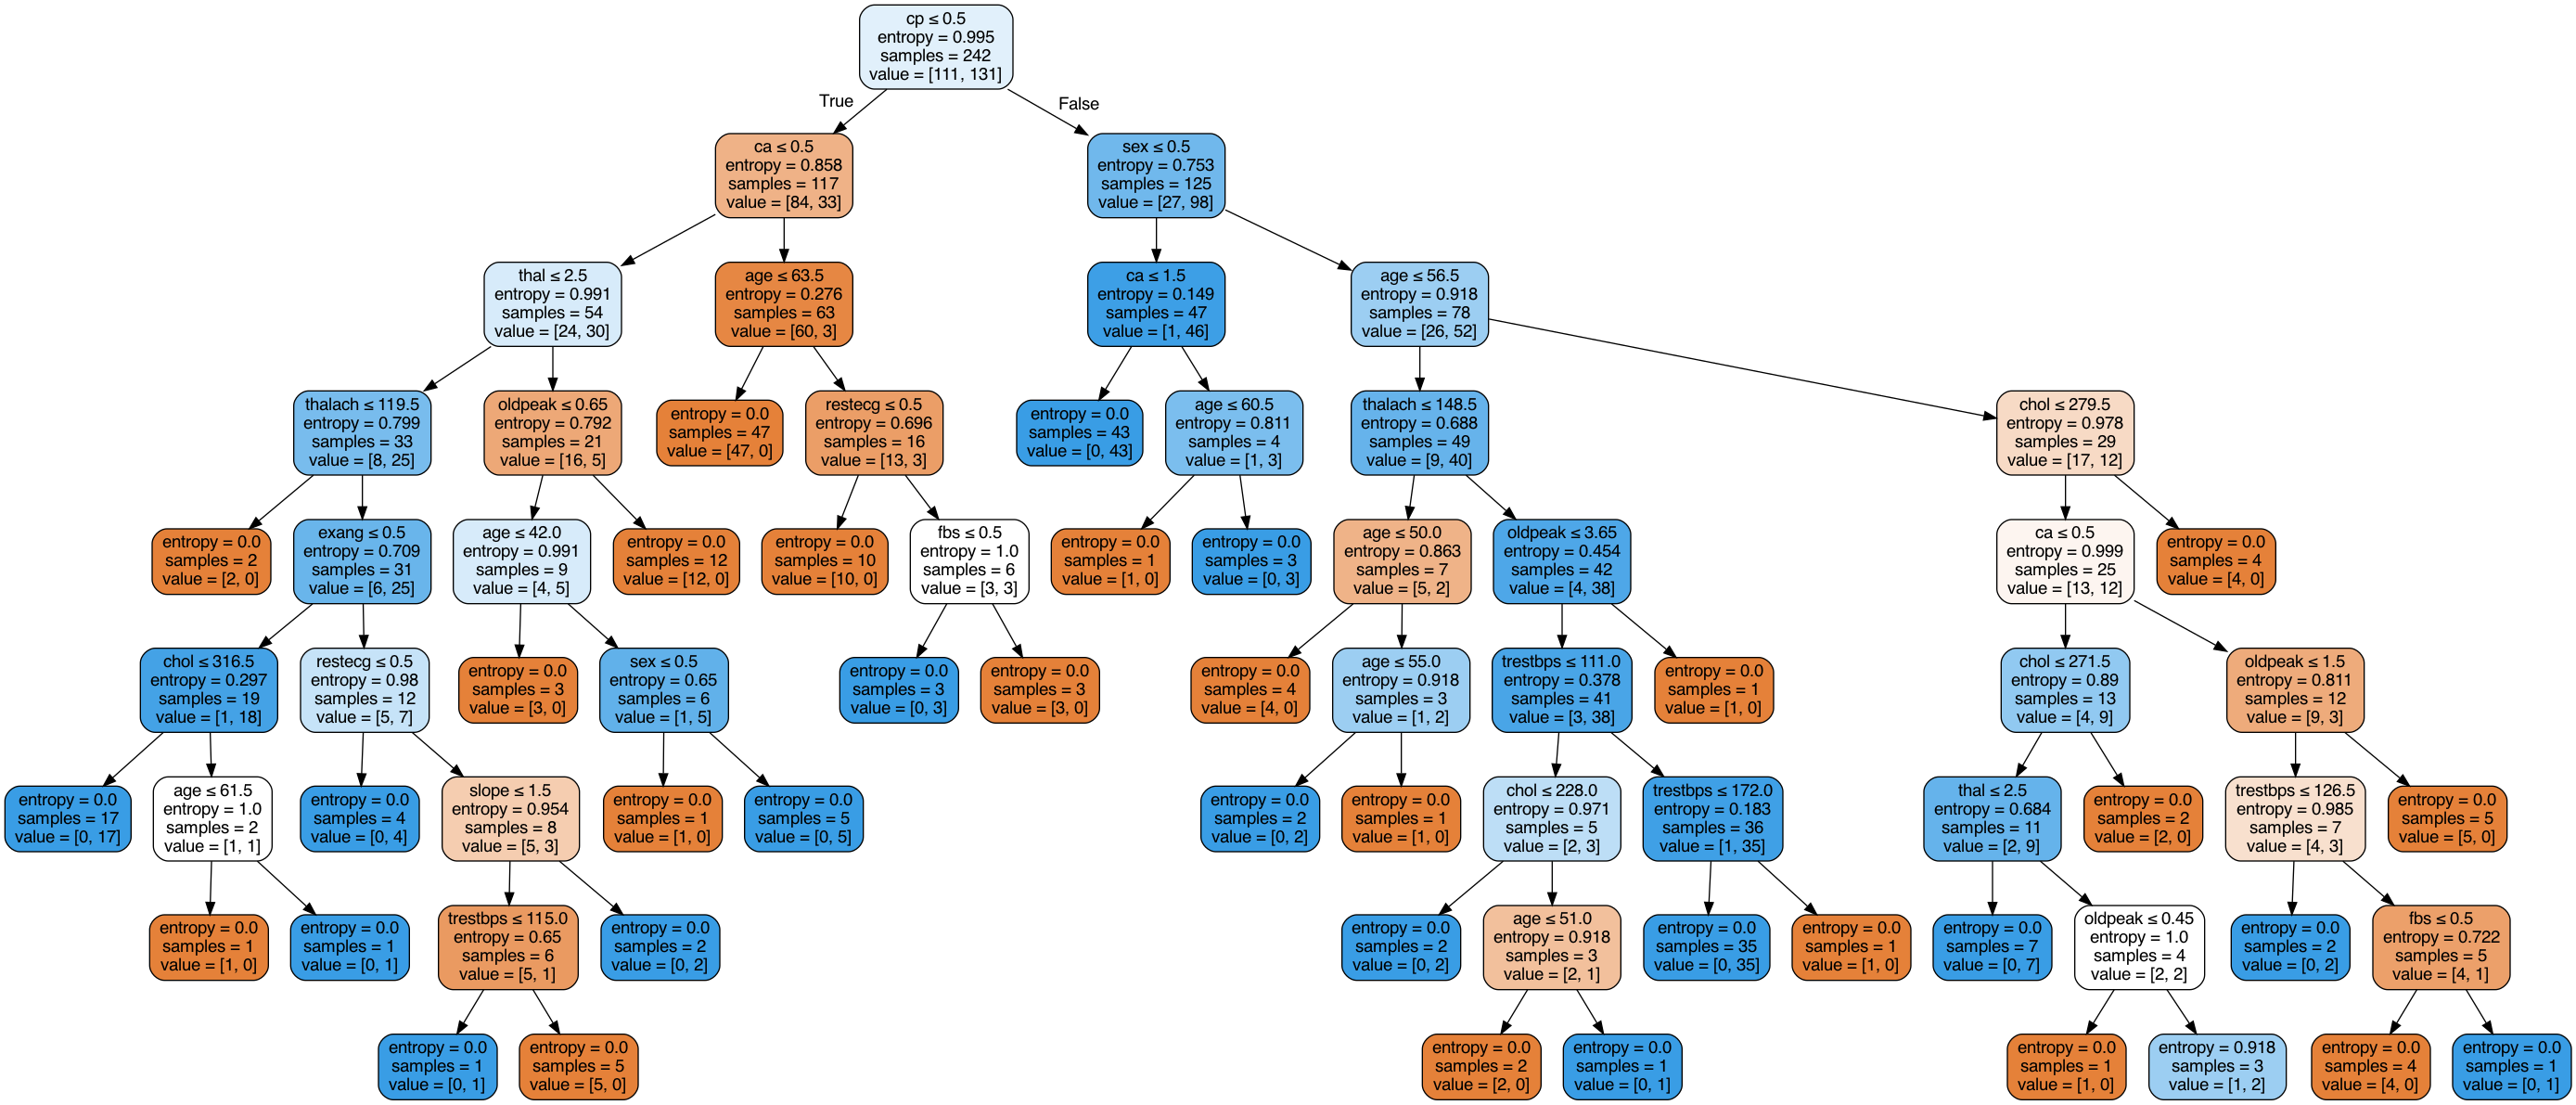

In [107]:
from IPython.display import Image
Image(filename = "tree.png")


Se encuentra ahora la importancia de características del sistema 



In [108]:
importances = dt.feature_importances_
index = np.argsort(importances)[::-1]

In [109]:
importances

array([0.14643902, 0.0814561 , 0.19446981, 0.07484028, 0.05548254,
       0.04036792, 0.03890902, 0.05465667, 0.01917026, 0.06454815,
       0.0156913 , 0.15496947, 0.05899945])